In [2]:
#Data Science case study records
#importing the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [3]:
#reading excel file selecting only first part
data=pd.ExcelFile("./movie_metadata.xls")
df=data.parse(0)  #choosing sheet number

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_movie_link             5043 non-

# Explanation of the above information
There is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. We can do different methods to address the issues of the data with missing values for example: imputation(mean, medina, mode, multiple imputation, Linear Regression), deletion( pairwise deletion, listwise delition(row deletion), deleting columns). Let's just remove the null values because I am just looking at the insight of data. 

In [7]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_movie_link               0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
movie_score                    0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(3756, 28)

Now looking at the statistics and distribution of the "gross" variable: which is our output variable to make our movie blockbuster. 

In [10]:
#Statistics 
df['gross'].describe()

count    3.756000e+03
mean     5.261282e+07
std      7.031787e+07
min      1.620000e+02
25%      8.270233e+06
50%      3.009311e+07
75%      6.688194e+07
max      7.605058e+08
Name: gross, dtype: float64

C:\Users\pande\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


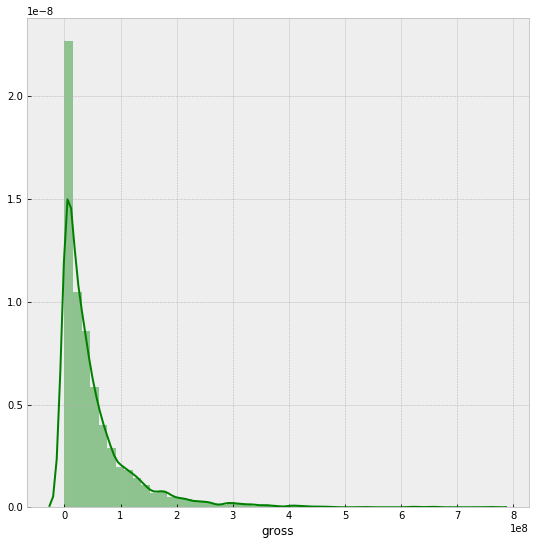

In [11]:
#distribution plot
plt.figure(figsize=(9,9))
sns.distplot(df['gross'], color='g')

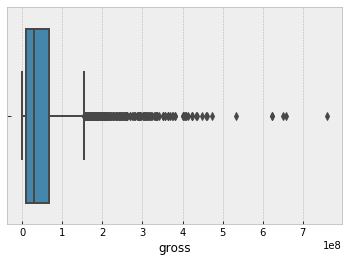

In [12]:
sns.boxplot(df["gross"])

With this information we can see that the prices are skewed right and some outliers lies above ~400,000,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`gross`) for machine learning.We can take the log transformation

C:\Users\pande\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


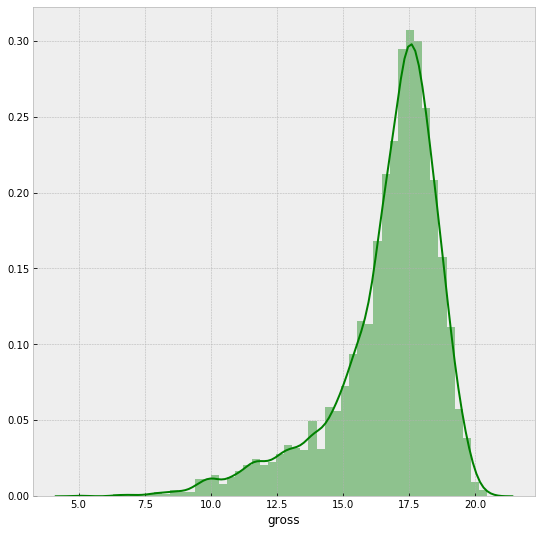

In [13]:
#log transformation plot
plt.figure(figsize=(9,9))
sns.distplot(np.log(df['gross']), color='g')

# Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them.To do so lets first list all the 
types of our data from our dataset and take only the numerical ones:

In [14]:
#seperation of data by continous and categorical group
df_cate=df.select_dtypes(include='object')
df_cont=df.select_dtypes(exclude='object')

In [15]:
df_cont.shape

(3756, 16)

In [16]:
df_cont.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


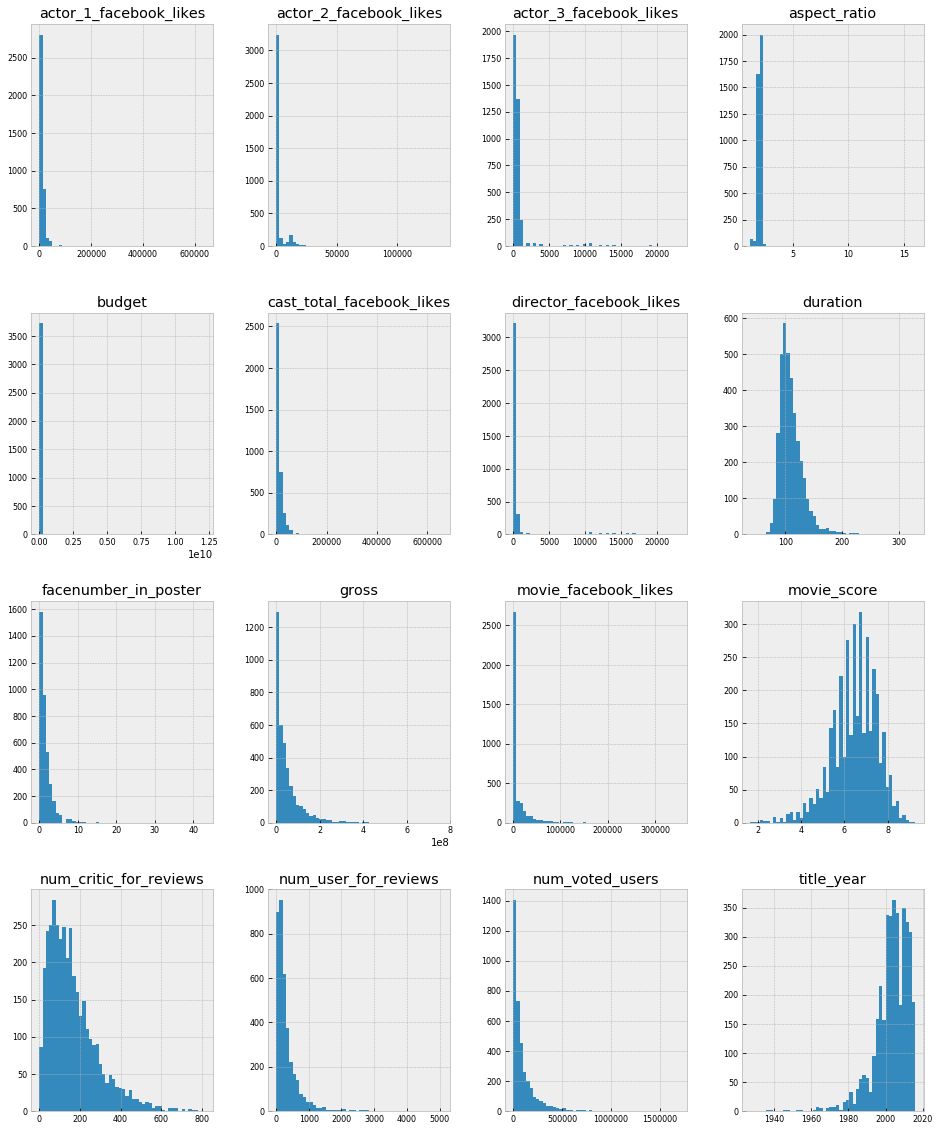

In [17]:
df_cont.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

From the above information we can see that the features such as "Num_voted_users", "num_user_for review", "facenumber_in_poster", "movie_facebook_likes"seems to share a similar distribution to the one we have with "gross". Lets check the further information

# Looking at the pair plot and corrlation
we can check the correltion by doing the pairplot



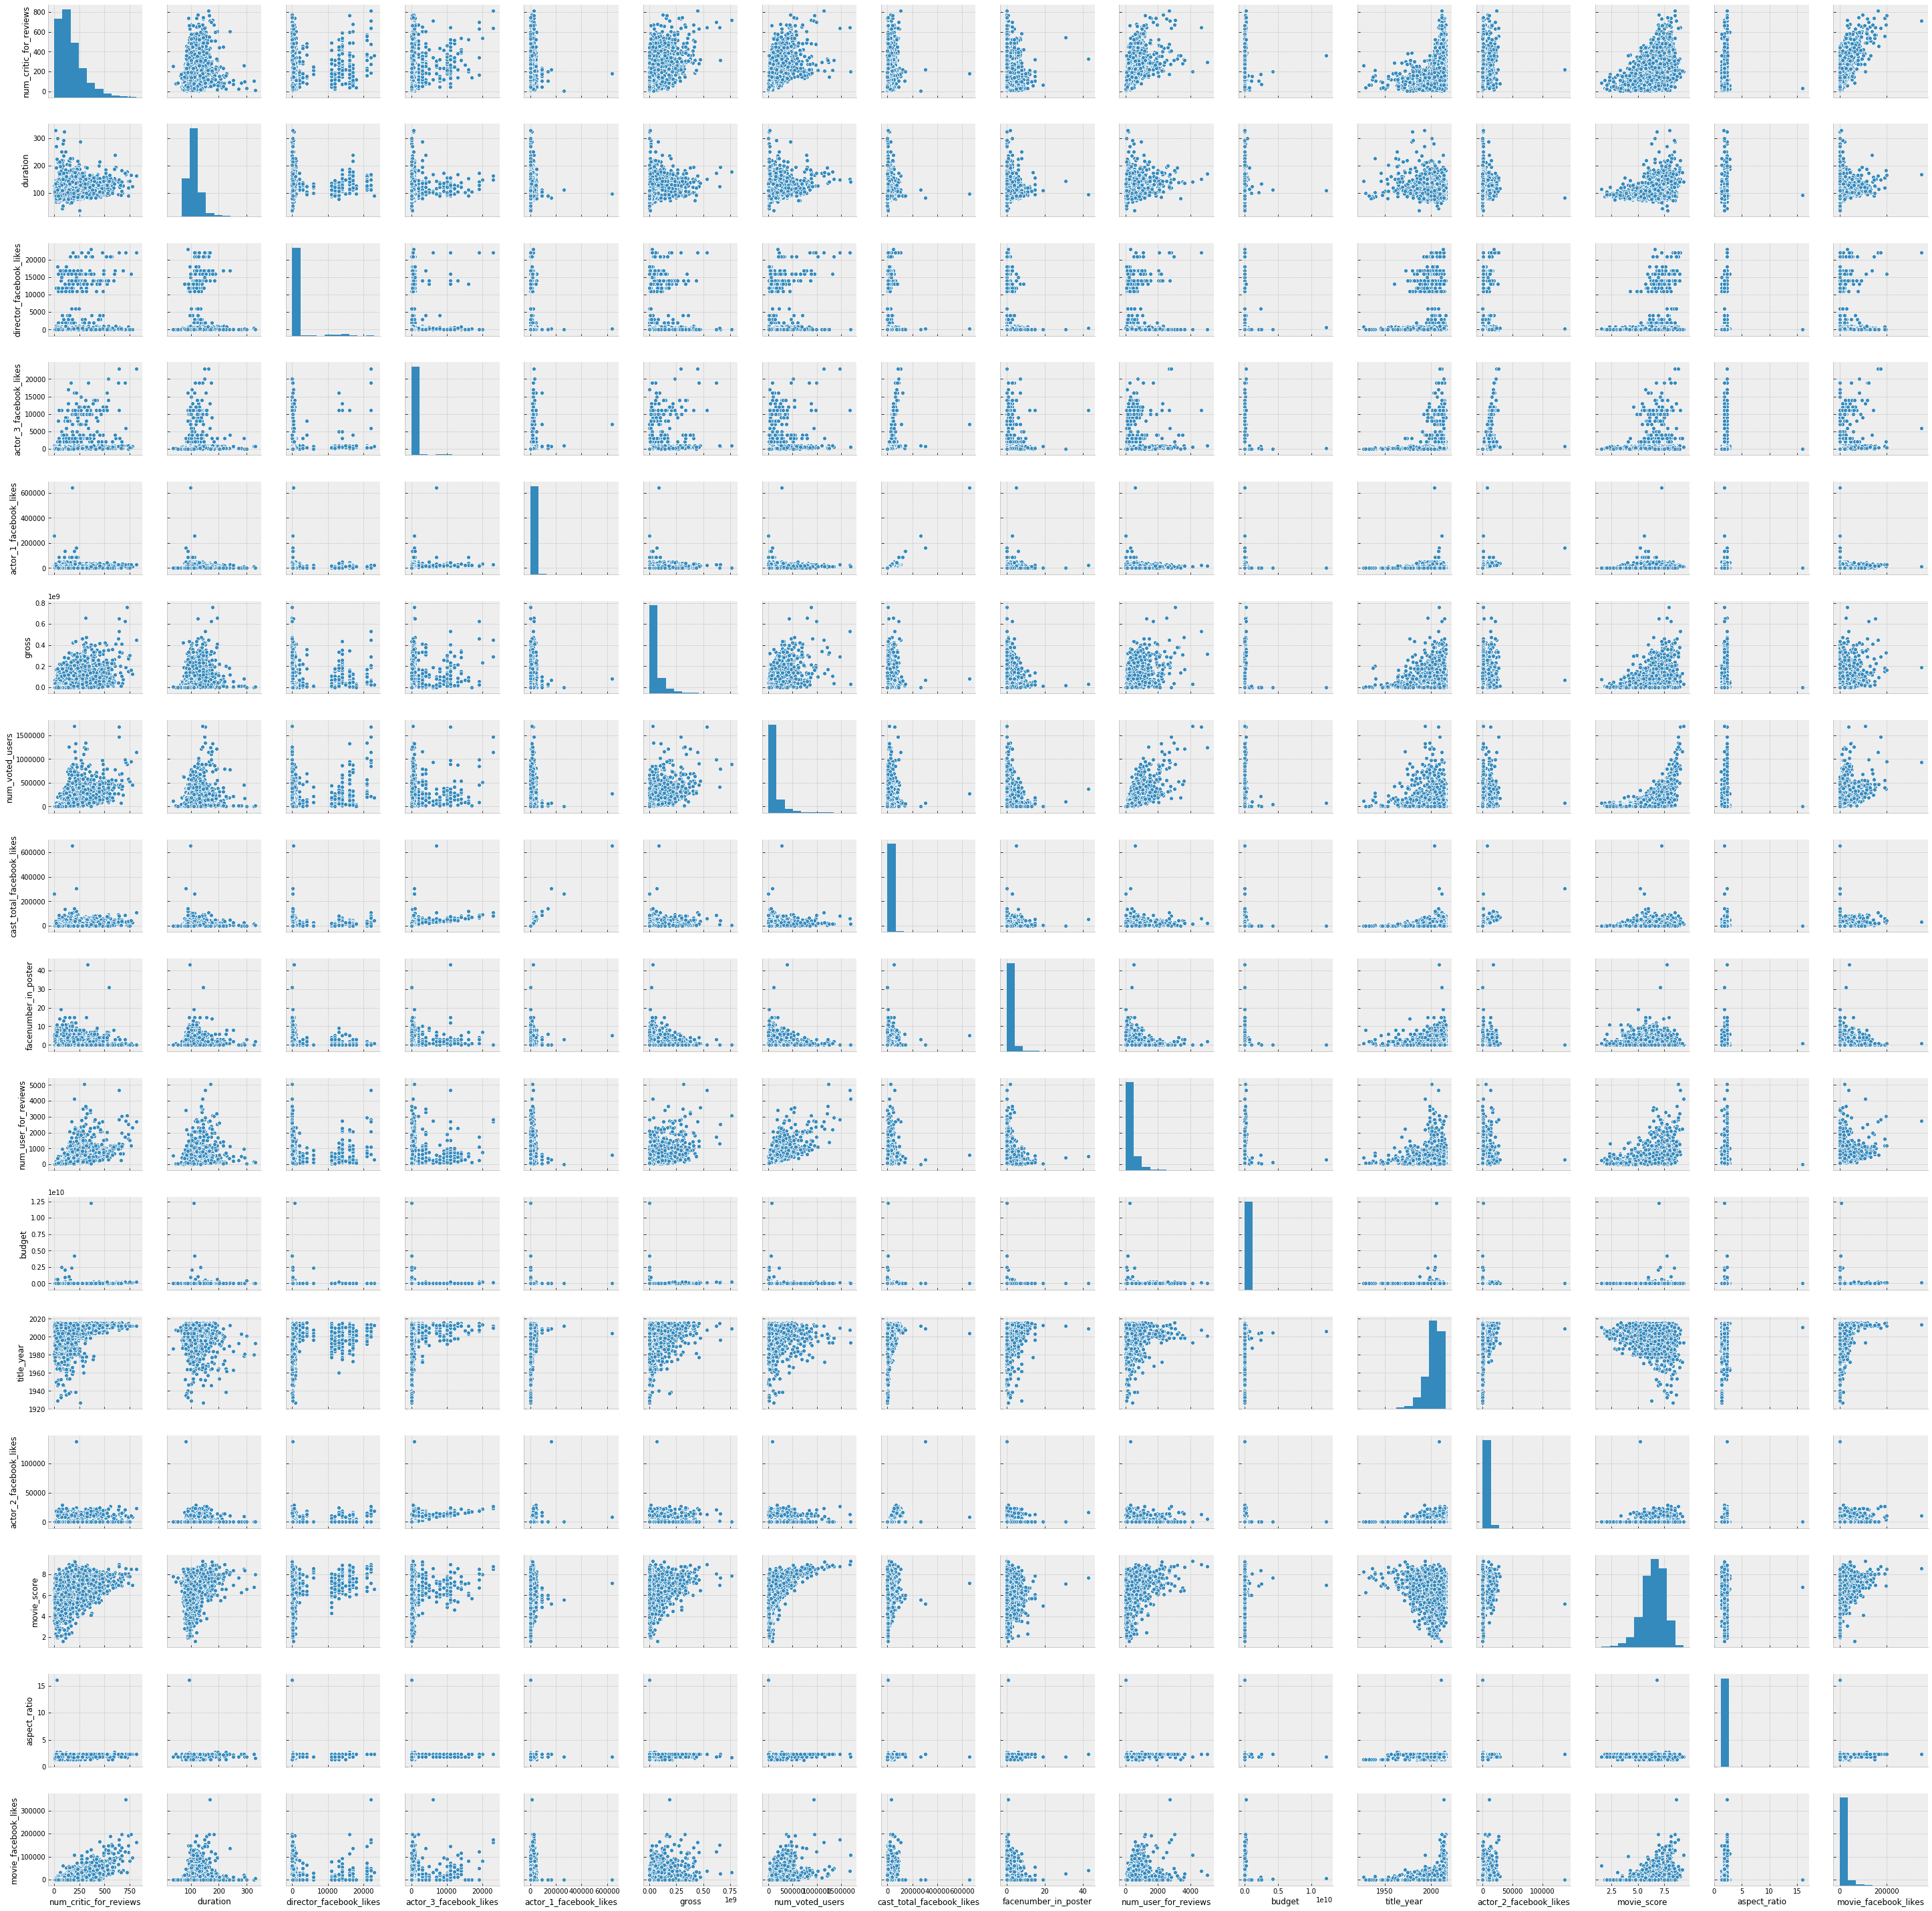

In [18]:
sns.pairplot(df_cont)

In [19]:
#correlation vales princ
correlation=df_cont.corr()
correlation

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


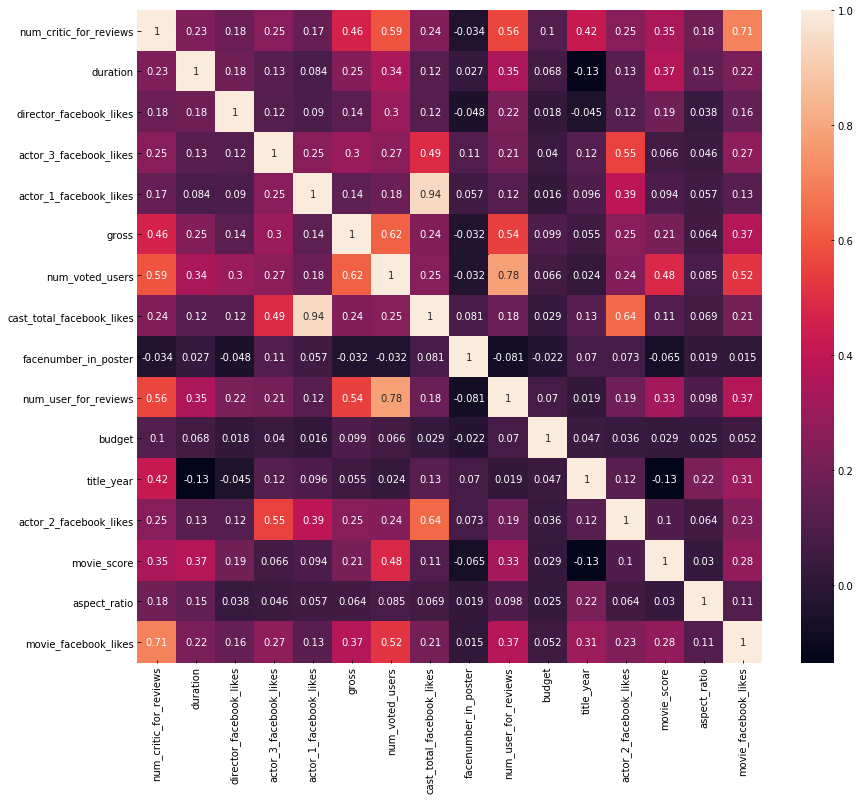

In [20]:
#identifying the strength of correlation by using the heatmap in seaborn
plt.figure(figsize=(14,12))
sns.heatmap(correlation, annot=True)

# Now selecting the strongly correlated featues with the "gross".
Here I am identifying the the most correlated features with our outcome variables gross. I have stored the those most features in zist_features by using my data set of continous variables named with df_cont.

In [21]:
features = [col for col in df_cont.columns if col!='gross']
df_cont_corr=df_cont.corr()['gross'][features]
zist_features_list=df_cont_corr[abs(df_cont_corr)>0.2].sort_values(ascending=False)
print("There is {} strongly coreelated values with gross: \n{}".format(len(zist_features_list), zist_features_list))

There is 9 strongly coreelated values with gross: 
num_voted_users              0.624949
num_user_for_reviews         0.544674
num_critic_for_reviews       0.464187
movie_facebook_likes         0.366933
actor_3_facebook_likes       0.299864
actor_2_facebook_likes       0.252842
duration                     0.245726
cast_total_facebook_likes    0.235601
movie_score                  0.214740
Name: gross, dtype: float64


# Further analysis in correlation
Perfect, we now have a list of strongly correlated variables but this list is incomplete as we know that correlation is affected by outliers. So I am going to proceed as follow:
- Plot the numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers
We know that, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

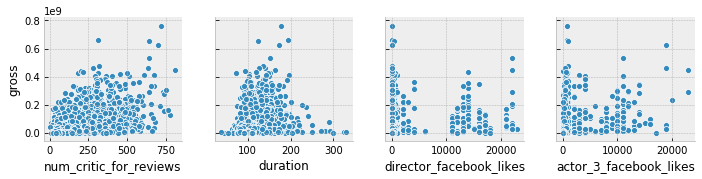

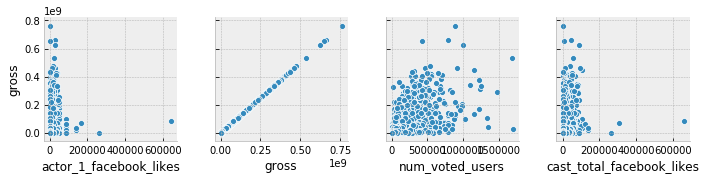

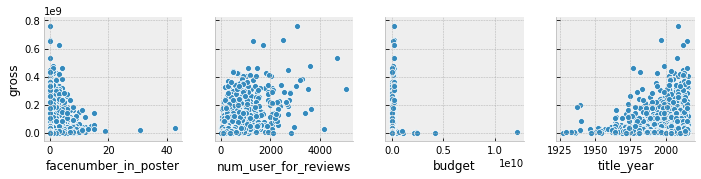

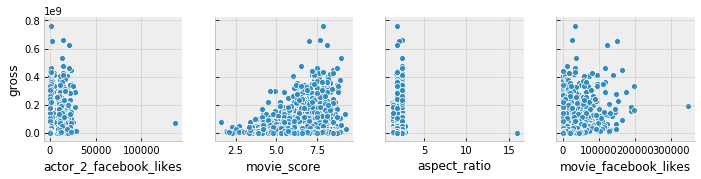

In [22]:
#Pair plot with the outcome variable "gross"
for i in range(0, len(df_cont.columns),4):
    sns.pairplot(data=df_cont, x_vars=df_cont.columns[i:i+4], y_vars=['gross'])

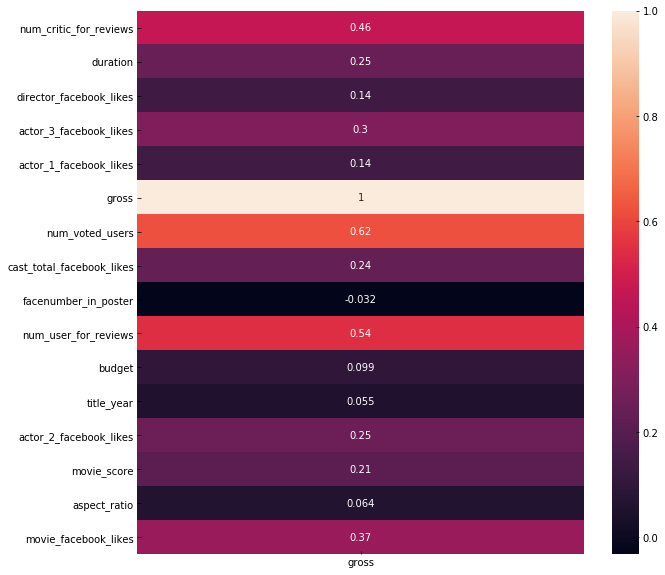

In [23]:
#Heat map plotting w.r.t target variable
plt.figure(figsize=(10,10))
sns.heatmap(df_cont.corr()[['gross']], annot=True);



We can clearly identify some relationships. Most of them seems to have a linear relationship (but not strongly) with the gross and if we look closely at the head map we can see that Highly correlated variables. We saw 4 features  "Num_voted_users", "num_user_for review", "number_critic_for_review", "movie_facebook_likes" are strongly correlated predictors with gross. 

# Feature to feature relationship
Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

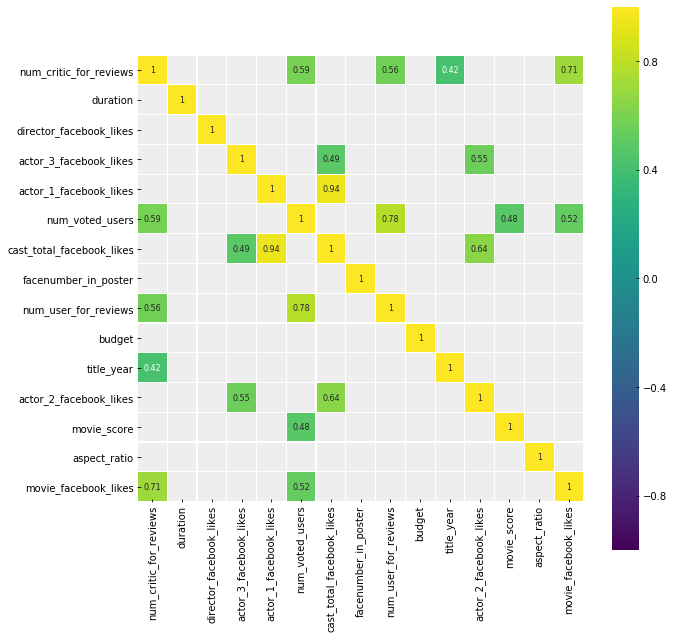

In [24]:
corr=df_cont.drop('gross', axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr>=0.4)| (corr<=-0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

A lot of features seems to be correlated between each other. It is obvious that higher the num_voted_user would would have higher num_critic_for_review, movie_score, num_users_for_review. We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features  and others indicates that people expect multiples features to be packaged together.

C:\Users\pande\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


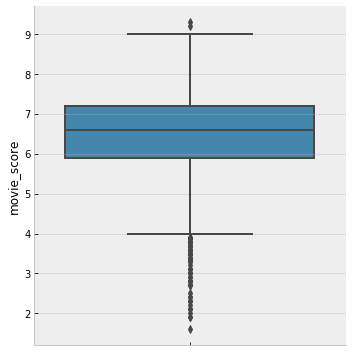

In [25]:
#Factor plot for selected features
sns.factorplot(y='movie_score', kind ='box', data=df_cont);

In [26]:
#count vs movie score 
another_data=df_cont.copy()
another_data['Scored_movie']=df_cont['movie_score'].apply(lambda x:int(round(x)))
another_data['Scored_movie'].value_counts()

6    1284
7    1268
8     606
5     392
4     132
3      32
9      28
2      14
Name: Scored_movie, dtype: int64

C:\Users\pande\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pande\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


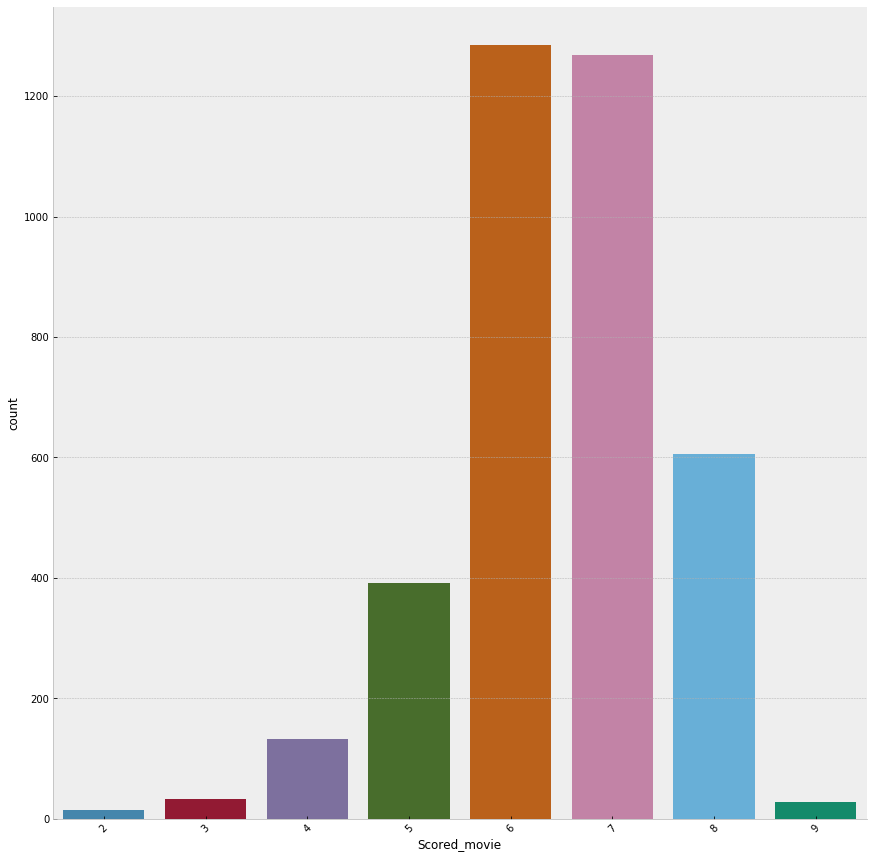

In [27]:
sns.factorplot(x='Scored_movie', kind='count', data=another_data, size=12);
plt.xticks(rotation=45);

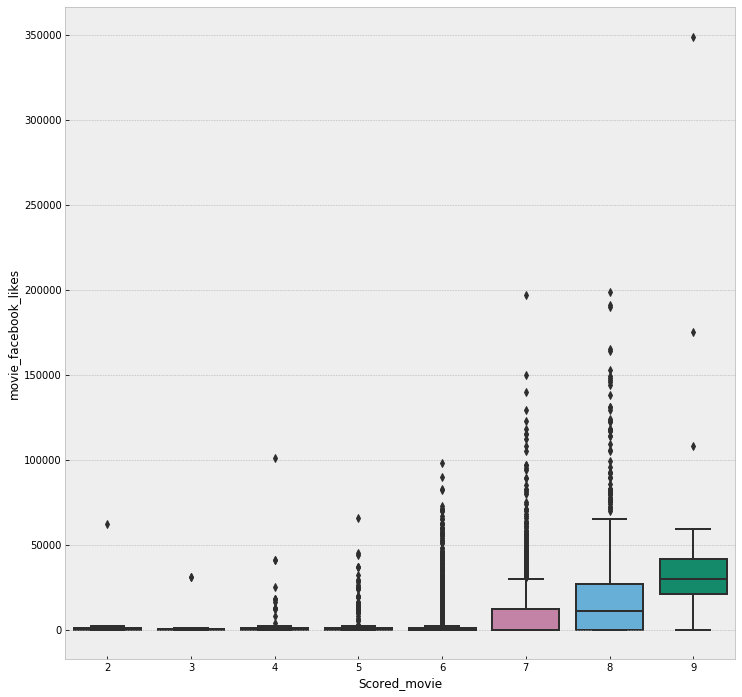

In [28]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Scored_movie',y='movie_facebook_likes',data=another_data)

# Identifying the relationship of categorical variables


In [29]:
print('There is {} non-numerical features including :\n{}'.format(len(df_cate.columns), df_cate.columns.tolist()))

There is 12 non-numerical features including :
['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_movie_link', 'language', 'country', 'content_rating']


Now lets look at some insight about categorical valriables

In [30]:
categorical_features=[a for a in df.columns.tolist() if (a not in features)]


In [31]:
df_categoric_withgorss=df[categorical_features]

In [32]:
df_categoric_withgorss.head()

,color,director_name,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_movie_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,Wes Studi,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter¬†,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.movie.com/title/tt0401729/?ref_=fn_...,English,USA,PG-13


Now plotting them 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

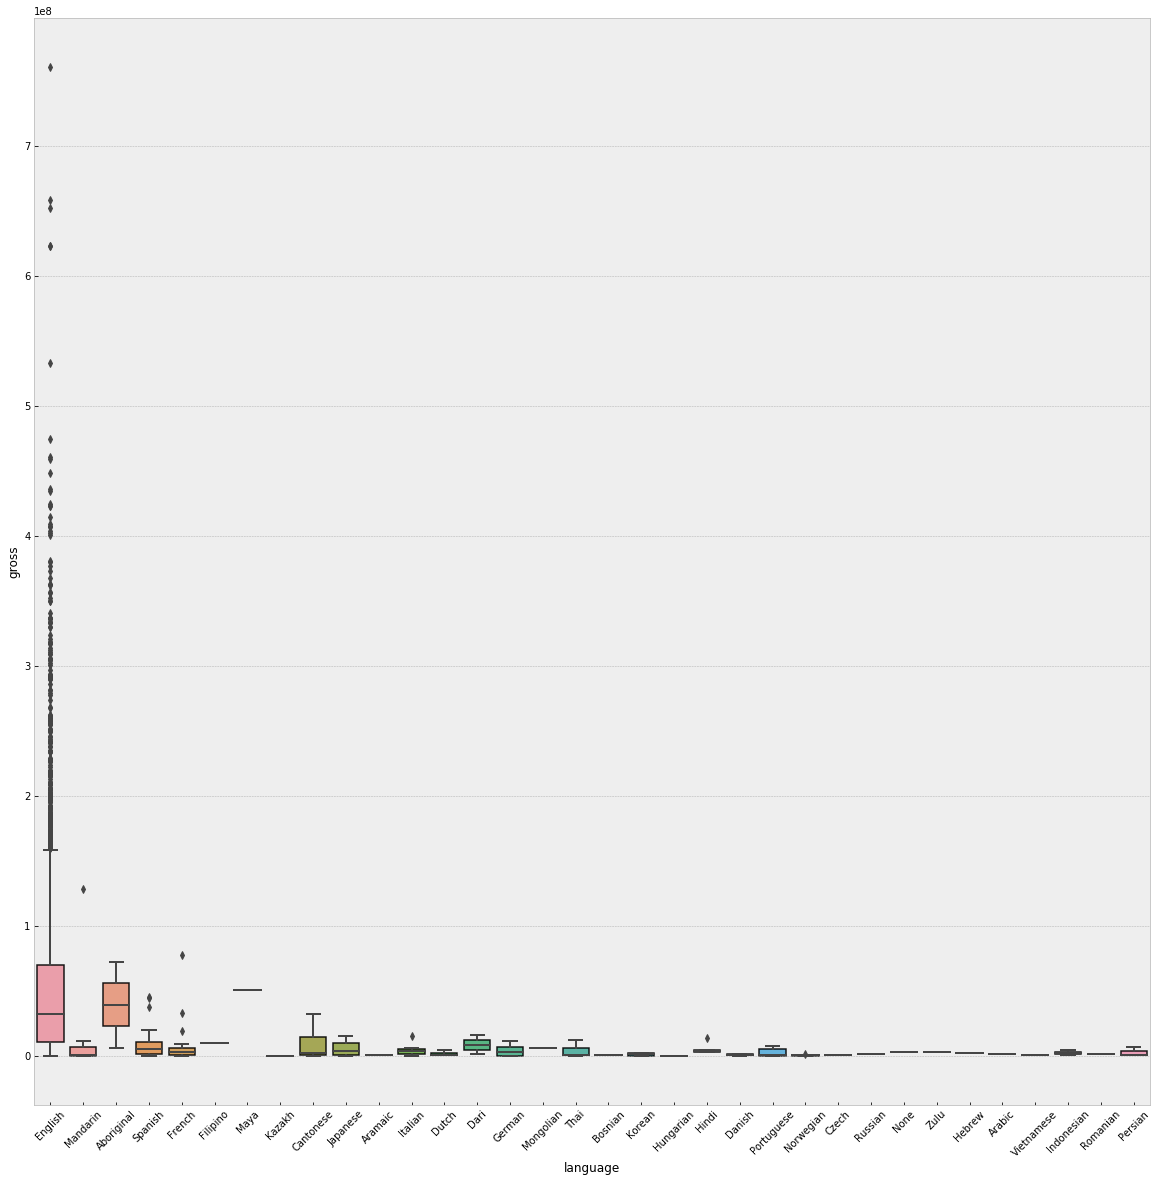

In [33]:
plt.figure(figsize=(20,20))
bt=sns.boxplot(x='language', y='gross', data=df_categoric_withgorss)
plt.setp(bt.artists, alpha=0.9, linewidth=1.5, edgecolor='k')
plt.xticks(rotation=45)

C:\Users\pande\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pande\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


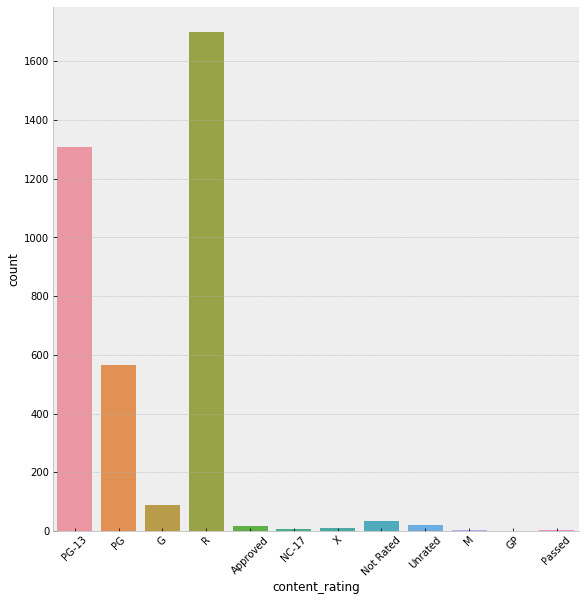

In [34]:
#factor plot for few variable
sns.factorplot(x='content_rating', kind='count', data=df_categoric_withgorss, size=8);
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

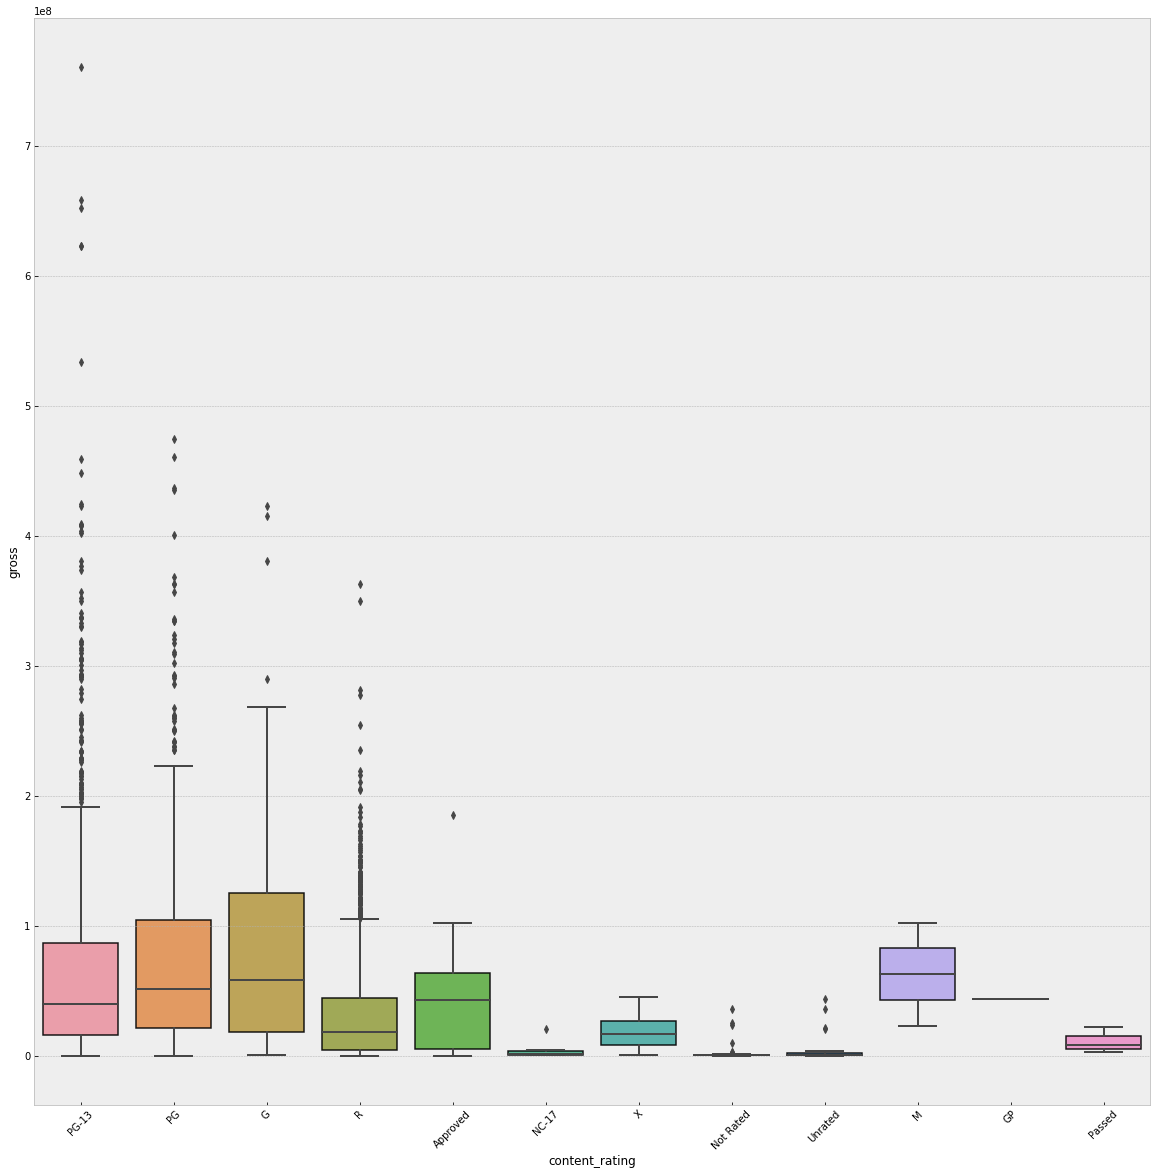

In [35]:
plt.figure(figsize=(20,20))
bt=sns.boxplot(x='content_rating', y='gross', data=df_categoric_withgorss)
plt.setp(bt.artists, alpha=0.9, linewidth=1.5, edgecolor='k')
plt.xticks(rotation=45)

In [36]:
len(df_categoric_withgorss['director_name'].unique())

1659

In [37]:
df_categoric_withgorss['director_name'].value_counts().head(30)

Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Martin Scorsese      16
Renny Harlin         15
Spike Lee            15
John Carpenter       13
Robert Rodriguez     13
Ron Howard           13
Oliver Stone         13
Michael Bay          13
Barry Levinson       13
Robert Zemeckis      13
Wes Craven           12
Shawn Levy           12
Sam Raimi            12
Tony Scott           12
Joel Schumacher      12
Richard Linklater    11
Rob Cohen            11
Chris Columbus       11
Rob Reiner           11
Peter Jackson        11
Brian De Palma       10
John McTiernan       10
Brett Ratner         10
David Fincher        10
Name: director_name, dtype: int64

# Application of Chi-Square Test for the significance test of categorical vari
The Chi-Square test of independence is a statistical test to determine if there is a significant relationship between  categorical variables and outcome variables. We are testing here whether particular variable has significant importance to the 
outcome variable or not. 
Here we apply the Chi-square because 
- Variables are Categorical

- Frequency is at least 5

In [38]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
        


In [39]:
#Initialize ChiSquare Class
cT = ChiSquare(df_categoric_withgorss)

#Feature Selection
testColumns = categorical_features
for var in testColumns:
    cT.TestIndependence(colX=var,colY="gross" ) 

color is NOT an important predictor. (Discard color from model)
director_name is IMPORTANT for Prediction
actor_2_name is IMPORTANT for Prediction
gross is IMPORTANT for Prediction
genres is IMPORTANT for Prediction
actor_1_name is IMPORTANT for Prediction
movie_title is IMPORTANT for Prediction
actor_3_name is IMPORTANT for Prediction
plot_keywords is IMPORTANT for Prediction
movie_movie_link is IMPORTANT for Prediction
language is IMPORTANT for Prediction
country is IMPORTANT for Prediction
content_rating is NOT an important predictor. (Discard content_rating from model)


In [40]:
#study about the genres of the movie
curated_data=df.copy()
curated_data['scored_movie']=df['movie_score'].apply(lambda x:int(round(x)))
curated_data['scored_movie'].value_counts()
df2=pd.get_dummies(curated_data, drop_first=True)

In [41]:
listing_gen = curated_data['genres'].str.split('|')
print(listing_gen[:6])

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
6            [Action, Adventure, Romance]
Name: genres, dtype: object


# Important variable selection using regression coefficient analysis


In [42]:
df2=pd.get_dummies(df, drop_first=True)

In [43]:
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,1,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,1,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,1,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
features = [col for col in df2.columns if col!='gross']
X = df2[features]
y= df2['gross']

In [46]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [47]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(2629, 19670) (1127, 19670)
(2629,) (1127,)


In [48]:
#fitting the linear regression model
lm = LinearRegression()
model=lm.fit(x_train, y_train)
prediction=lm.predict(x_test)

In [49]:
model.score(x_test, y_test)

0.45863474657560105

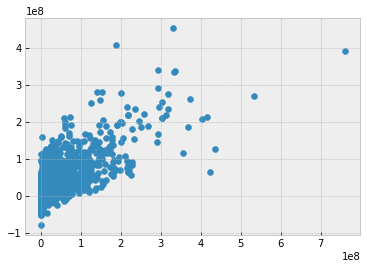

In [50]:
plt.scatter(y_test, prediction)

In [51]:
coefficient=pd.Series(model.coef_, index=X.columns)
coefficient.sort_values(ascending=False).head(20)

actor_3_name_Gloria Stuart                                                               8.196633e+07
plot_keywords_artist|love|ship|titanic|wet                                               8.196633e+07
movie_title_Titanic¬†                                                                    8.196633e+07
movie_movie_link_http://www.movie.com/title/tt0120338/?ref_=fn_tt_tt_1                   8.196633e+07
movie_movie_link_http://www.movie.com/title/tt0369610/?ref_=fn_tt_tt_1                   7.103030e+07
actor_3_name_Omar Sy                                                                     7.103030e+07
plot_keywords_dinosaur|disaster film|experiment gone wrong|jurassic park|velociraptor    7.103030e+07
movie_title_Jurassic World¬†                                                             7.103030e+07
director_name_James Cameron                                                              6.812404e+07
actor_2_name_Robert Downey Jr.                                                    

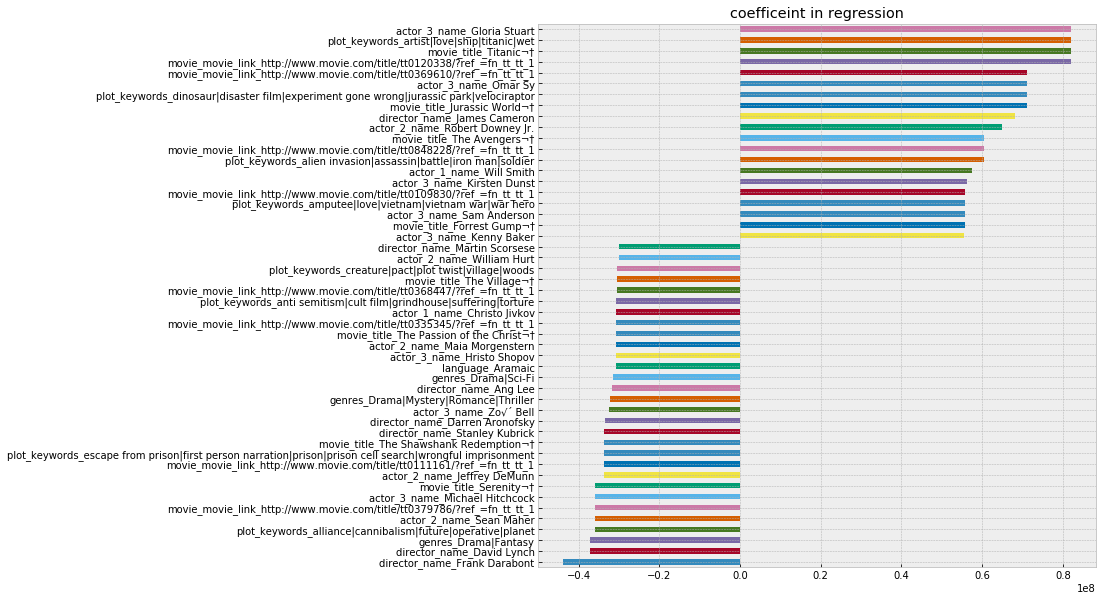

In [53]:
#Visuzling the coefficient
imp_coef=pd.concat([coefficient.sort_values().head(30), coefficient.sort_values().tail(20) ])
plt.figure(figsize=(10,10))
imp_coef.plot(kind='barh')
plt.title("coefficeint in regression")
plt.show()

# Answering the questions
- What are your observations based on exploration of this data?
Define the problem: to findout the recipe to make a blockbuster, profitable movie? 
I did EDA, for the features with numerical values I computed the correlation: 
    - observing the correlation num_voted_users, num_user_for_reviews, num_critic_for_reviews, movie_facebook_likes, actor_3_facebook_likes, actor_2_facebook_likes, duration, cast_total_facebook_likes
    are most correlated variable and they have positive correlation which means increasing the values of these variables would increase the gross income of the movie. 
    For the categorical variables I did the encoding and computed the Chi-square test for significance test to figure out the significant features. I also used the regression coefficient analysis to figure out important variables. The above figure clearly explains the important features. 
    
- What is the recipe to make a blockbuster, profitable movie? Share your hypothesis and insights based on the data here.
From my observation and analysis, I would say to make a blockbuster moview we have to make resonable durtion of the movie, choose right dierctor, right actor, choose correct movie genre, assign significant amount of budget, select perfect movie title are the factors. 
    
    
